<a href="https://colab.research.google.com/github/ManisMalakar/Recurrent-Neural-Network/blob/main/RNN_and_LSTM_for_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Data PreProcessing
#Importing the dataset
from tensorflow.keras.datasets import mnist

#Loading the dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
y_test.shape,y_train.shape

((10000,), (60000,))

In [9]:
x_train.min(),x_train.max()

(0, 255)

In [10]:
y_train.min(),y_train.max()

(0, 9)

In [11]:
#Normalizing the dataset
x_train=x_train/255.0
x_test=x_test/255.0

In [12]:
x_train.min(),x_train.max()

(0.0, 1.0)

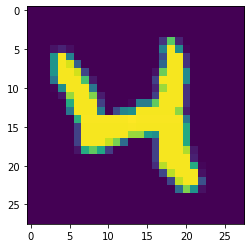

In [13]:
plt.imshow(x_train[20])

In [14]:
y_train[20]

4

In [15]:
#Building the model
#Initializing RNN
model=tf.keras.models.Sequential()

#Adding the first LSTM layer
model.add(tf.keras.layers.LSTM(units=128,activation='relu',return_sequences=True, input_shape=(28,28)))

In [16]:
#Adding the dropuout layer
model.add(tf.keras.layers.Dropout(0.2))

In [17]:
#Adding the second LSTM layer
model.add(tf.keras.layers.LSTM(units=128,activation='relu'))

In [18]:
#Adding the dropuout layer
model.add(tf.keras.layers.Dropout(0.2))

In [19]:
#Adding the fully connected dense layer
model.add(tf.keras.layers.Dense(units=32,activation='relu'))

#Adding the dropuout layer
model.add(tf.keras.layers.Dropout(0.2))

In [20]:
#Adding the output layer
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 128)           80384     
_________________________________________________________________
dropout (Dropout)            (None, 28, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [22]:
#Optimizer
opt=tf.keras.optimizers.Adam(learning_rate=0.001)

In [23]:
#Compiling the mode
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 106s 56ms/step - loss: 1.1943 - accuracy: 0.5844 - val_loss: 0.1787 - val_accuracy: 0.9439
Epoch 2/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.2105 - accuracy: 0.9422 - val_loss: 0.1074 - val_accuracy: 0.9666
Epoch 3/10
1875/1875 [==============================] - 102s 55ms/step - loss: 0.1272 - accuracy: 0.9664 - val_loss: 0.0840 - val_accuracy: 0.9765
Epoch 4/10
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0925 - accuracy: 0.9754 - val_loss: 0.0712 - val_accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 101s 54ms/step - loss: 0.2745 - accuracy: 0.9626 - val_loss: 0.0574 - val_accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0694 - accuracy: 0.9816 - val_loss: 0.0535 - val_accuracy: 0.9841
Epoch 7/10
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0597 - accuracy: 0.9842 - val_loss: 0

In [25]:
#Making predictions
y_pred=model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [26]:
print(y_pred[10]),print(y_pred[10])

0
0


(None, None)

In [27]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 972    0    0    0    0    1    3    1    3    0]
 [   0 1134    0    0    0    0    1    0    0    0]
 [   1    2 1022    1    1    0    1    3    0    1]
 [   0    0    3  986    0   15    0    2    4    0]
 [   0    0    0    0  976    0    1    0    0    5]
 [   0    1    1    1    0  887    1    1    0    0]
 [   2    4    1    0    1    8  942    0    0    0]
 [   0    2    5    0    1    0    0 1017    0    3]
 [   0    4    1    1    2    5    1    3  957    0]
 [   1    0    0    0   11   10    0   10    3  974]]


In [28]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9867


In [29]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

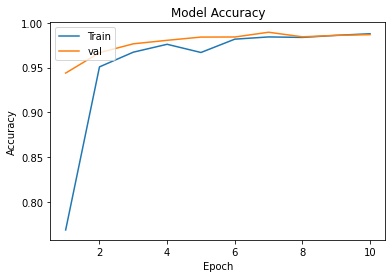

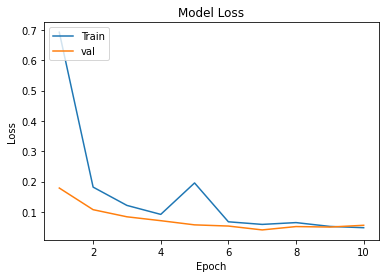

In [30]:
learning_curve(history, 10)